In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_excel(r'C:\Users\nickp\Desktop\data science\house prices\king county price data.xlsx')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,three,1.00,1180,5650,one,no,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,three,2.25,2570,7242,two,no,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,two,1.00,770,10000,one,no,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,four,3.00,1960,5000,one,no,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,three,2.00,1680,8080,one,no,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Visualizing Data

In [3]:
sales.describe()

,id,price,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,2.114757,2079.899736,1.510697e+04,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.770163,918.440897,4.142051e+04,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,290.000000,5.200000e+02,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,1.750000,1427.000000,5.040000e+03,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,2.250000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,2.500000,2550.000000,1.068800e+04,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,8.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


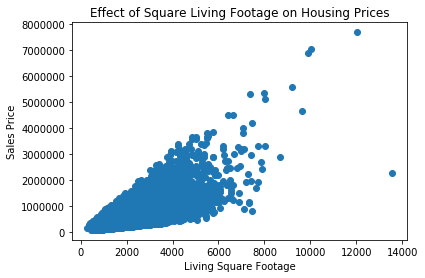

In [4]:
plt.scatter(sales['sqft_living'], sales['price'])
plt.ylabel('Sales Price')
plt.xlabel('Living Square Footage')
plt.title('Effect of Square Living Footage on Housing Prices')
plt.show()

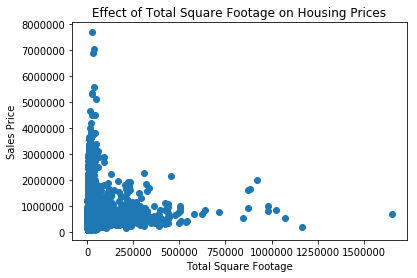

In [5]:
plt.scatter(sales['sqft_lot'], sales['price'])
plt.ylabel('Sales Price')
plt.xlabel('Total Square Footage')
plt.title('Effect of Total Square Footage on Housing Prices')
plt.show()

In [6]:
corr = sales.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00516023,-0.0122578,-0.132109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.525138,0.702035,0.0896609,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bathrooms,0.00516023,0.525138,1,0.754665,0.0877397,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.754665,1,0.172826,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0877397,0.172826,1,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
view,0.0115924,0.397293,0.187737,0.284611,0.0747101,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,-0.124982,-0.0587526,-0.00895825,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552
grade,0.00813045,0.667434,0.664983,0.762704,0.113621,0.251321,-0.144674,1,0.755923,0.168392,0.446963,0.0144143,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.0108421,0.605567,0.685342,0.876597,0.183512,0.167649,-0.158214,0.755923,1,-0.0519433,0.423898,0.0232847,-0.26119,-0.000816499,0.343803,0.73187,0.19405
sqft_basement,-0.00515113,0.323816,0.28377,0.435043,0.0152862,0.276947,0.174105,0.168392,-0.0519433,1,-0.133124,0.0713229,0.0748446,0.110538,-0.144765,0.200355,0.0172762


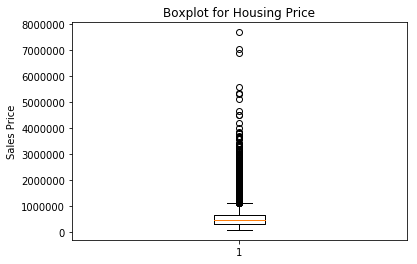

In [7]:
plt.boxplot(sales['price'])
plt.ylabel('Sales Price')
plt.title('Boxplot for Housing Price')
plt.show()

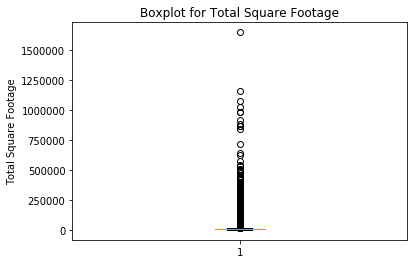

In [8]:
plt.boxplot(sales['sqft_lot'])
plt.ylabel('Total Square Footage')
plt.title('Boxplot for Total Square Footage')
plt.show()

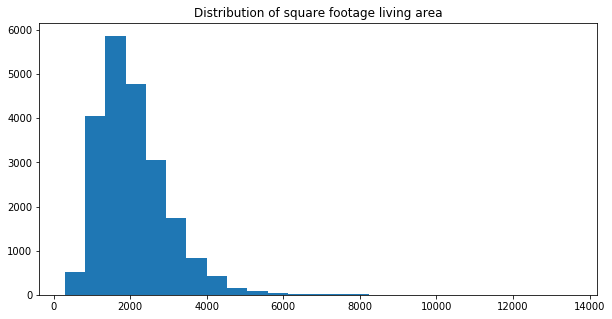

In [9]:
plt.figure(figsize=(10,5))
plt.hist(sales['sqft_living'], bins = 25)
plt.title('Distribution of square footage living area')
plt.show()

In [10]:
bedroom_count = sales[['bedrooms', 'id']].groupby(['bedrooms']).count()
bedroom_count = bedroom_count.sort_values(['id'], ascending=False)
bedroom_count

,id
bedrooms,
three,9824
four,6882
two,2760
five,1601
six,272
one,199
seven,38
eight,13
none,13


In [11]:
#Checking Highest Total Square Footage Datapoint
high_total_sqft = sales.loc[sales['sqft_lot'] > 750000]
high_total_sqft

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327T000000,700000,four,1.00,1300,1651359,one,no,3,...,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
3949,722069232,20140905T000000,998000,four,3.25,3770,982998,two,no,0,...,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
4441,3626079040,20140730T000000,790000,two,3.00,2560,982278,one,no,0,...,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946
4540,2522029039,20140929T000000,550000,three,2.00,3650,843309,two,no,0,...,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992
6691,2624089007,20150320T000000,1998000,two,2.50,3900,920423,two,no,0,...,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
7077,2724079090,20150105T000000,1650000,four,3.25,3920,881654,three,no,3,...,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384
7647,2623069031,20140521T000000,542500,five,3.25,3010,1074218,one and a half,no,0,...,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,2323089009,20150119T000000,855000,four,3.50,4030,1024068,two,no,0,...,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
9714,225079036,20150107T000000,937500,four,4.00,5545,871200,two,no,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
17319,3326079016,20150504T000000,190000,two,1.00,710,1164794,one,no,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


In [12]:
#Removing outliers from total square footage
sales = sales.loc[sales['sqft_lot'] <= 750000]

In [13]:
#Remove bedrooms outlier and don't want houses with no bedrooms
sales = sales[~sales['bedrooms'].isin(['thirty three', 'eleven', 'none'])]

In [14]:
def set_renovated(row):
    if row["yr_renovated"] > 0:
        return "Yes"
    else:
        return "No"

sales = sales.assign(renovated=sales.apply(set_renovated, axis=1))

In [15]:
#Remove living square footage outlier
sales = sales.loc[sales['sqft_living'] <= 13000]
sales = sales.drop(['yr_renovated'], axis = 1)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900,three,1.00,1180,5650,one,no,0,...,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,20141209T000000,538000,three,2.25,2570,7242,two,no,0,...,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,20150225T000000,180000,two,1.00,770,10000,one,no,0,...,6,770,0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,20141209T000000,604000,four,3.00,1960,5000,one,no,0,...,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,20150218T000000,510000,three,2.00,1680,8080,one,no,0,...,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,No
